<a href="https://colab.research.google.com/github/marekcrn/MLF/blob/main/Project-mini/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MPA-MLF - Miniproject**
Classification of wireless transmitters

Marek Černý, Dušan Kratochvíl

## **Task description**

Your task will be to determine the number of wireless transmitters based on the hardware imperfections. You
are provided with the dataset. The dataset consists of 19200 samples and 9 features in total. The features represent the main radio frequency impairments, such as: cfo_meas, cfo_demod, gain_imb, iq_imb, or_off, quadr_err, ph_err, mag_err and evm.


### 0. Import libraries

In [31]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

### 1. Mount google drive and load dataset

In [32]:
drive.mount('/content/drive')
dataset = pd.read_csv('drive/MyDrive/Data_prepared_final.csv')
dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,time [s],cfo_meas,cfo_demod,gain_imb,iq_imb,or_off,quadr_err,ph_err,mag_err,evm
0,0,45181.524,-414,-421.076324,0.076097,-46.987598,-27.219631,0.104362,1.129778,0.440299,2.059935
1,1,45182.129,-414,-423.571686,0.069879,-47.852627,-26.934967,0.053158,1.050010,0.431240,1.815053
2,2,45182.550,-414,-421.033936,0.061466,-48.968697,-27.130722,-0.045913,0.989473,0.447790,1.762053
3,3,45182.971,-414,-420.103546,0.078836,-46.756973,-27.005318,0.081583,1.085091,0.443476,1.894204
4,4,45183.551,-432,-420.781097,0.066053,-47.048218,-27.358521,0.081920,1.023701,0.465225,1.805841
...,...,...,...,...,...,...,...,...,...,...,...
19195,19195,54245.724,216,215.584991,0.077551,-35.409054,-28.611925,1.875334,0.999375,1.427339,2.248822
19196,19196,54246.340,216,215.247406,0.044961,-35.508205,-27.954048,1.898758,1.031501,1.478366,2.320668
19197,19197,54246.770,216,216.761307,0.070066,-35.038486,-28.467575,2.015116,1.090227,1.468599,2.382019
19198,19198,54247.379,216,215.353516,0.048611,-35.413639,-28.528139,1.916172,0.999381,1.497681,2.283976


### 2. Function that calcucates and plots elbow curve

In [33]:
def elbow(n_components: int):

    # Standardize the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    # Apply PCA for feature reduction
    pca = PCA(n_components=n_components)  # Reduce to n principal components
    data_pca = pca.fit_transform(data_scaled)

    # Apply the elbow method to find the optimal k (number of clusters)
    wcss = []

    # Repeat K-means for different values of k (number of clusters)
    for k in range(2, 20):
        kmeans = KMeans(n_clusters=k, init='random', random_state=0, n_init='auto')
        kmeans.fit(data_pca)
        wcss.append(kmeans.inertia_)

    # Plot the elbow curve
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, 20), wcss, marker='o', linestyle='--')
    plt.title('Elbow Method for PCA = ' + str(n_components))
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.xticks(range(1, 20))
    plt.grid(True)
    plt.show()

### 3. Plotting elbow curve for different PCAs

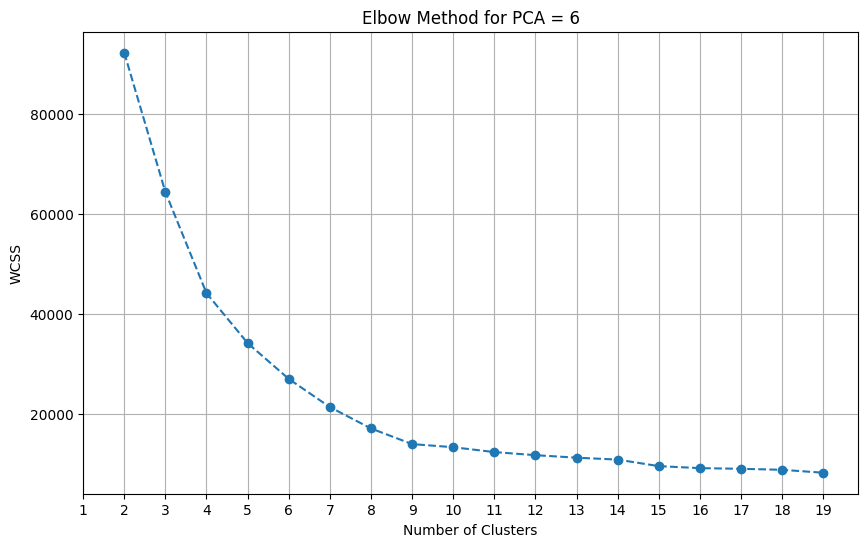

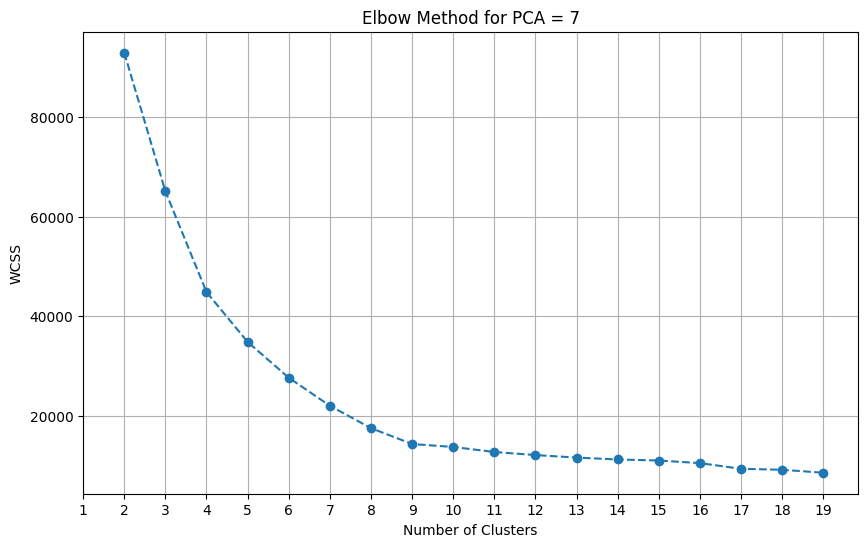

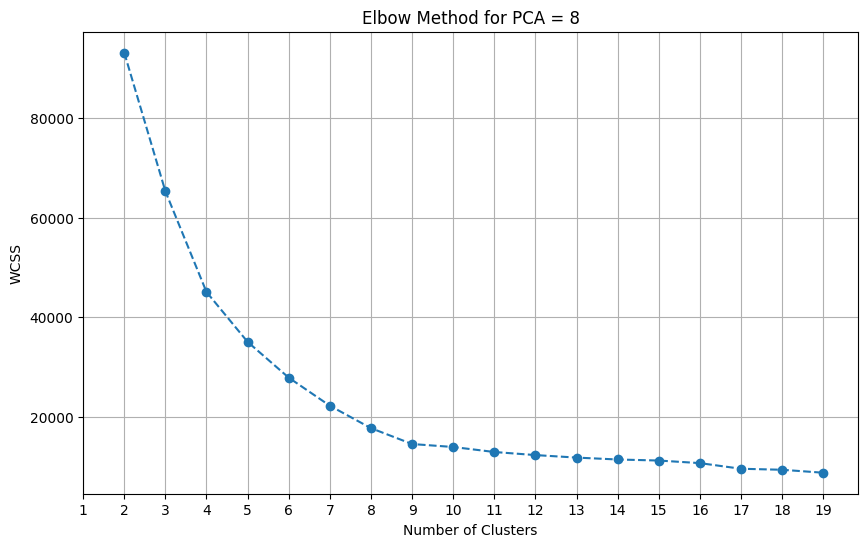

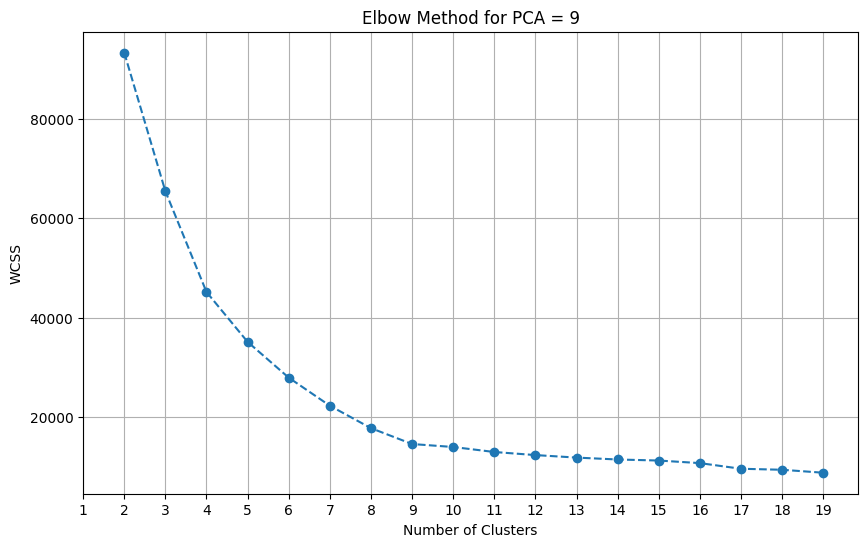

In [40]:
# Perform data preprocessing for measured data
data = dataset[['cfo_meas', 'cfo_demod', 'gain_imb', 'iq_imb', 'or_off', 'quadr_err', 'ph_err', 'mag_err', 'evm']]

for i in range(6,10):
    elbow(i)

### 4. Data normalization

In [35]:
normalized_data = (dataset - dataset.mean()) / dataset.std()
normalized_data

,Unnamed: 0,time [s],cfo_meas,cfo_demod,gain_imb,iq_imb,or_off,quadr_err,ph_err,mag_err,evm
0,-1.731915,-1.133287,-0.102180,-0.119056,0.684291,-2.184469,1.049122,-0.120519,-0.427749,-1.487508,-0.976210
1,-1.731735,-1.133221,-0.102180,-0.125103,0.551459,-2.344686,1.125660,-0.140911,-0.759339,-1.497187,-1.281679
2,-1.731555,-1.133176,-0.102180,-0.118953,0.371703,-2.551401,1.073027,-0.180365,-1.010986,-1.479506,-1.347791
3,-1.731374,-1.133130,-0.102180,-0.116699,0.742813,-2.141753,1.106745,-0.129590,-0.613511,-1.484115,-1.182945
4,-1.731194,-1.133066,-0.145904,-0.118341,0.469693,-2.195696,1.011779,-0.129456,-0.868706,-1.460877,-1.293169
...,...,...,...,...,...,...,...,...,...,...,...
19195,1.731194,-0.145119,1.428160,1.423793,0.715363,-0.039926,0.674776,0.584759,-0.969825,-0.432914,-0.740592
19196,1.731374,-0.145052,1.428160,1.422974,0.019064,-0.058291,0.851659,0.594088,-0.836280,-0.378395,-0.650971
19197,1.731555,-0.145005,1.428160,1.426643,0.555452,0.028709,0.713587,0.640426,-0.592157,-0.388831,-0.574441
19198,1.731735,-0.144939,1.428160,1.423232,0.097047,-0.040776,0.697303,0.601022,-0.969802,-0.357758,-0.696740


### 5. Calculating and plotting cumulative variance curve

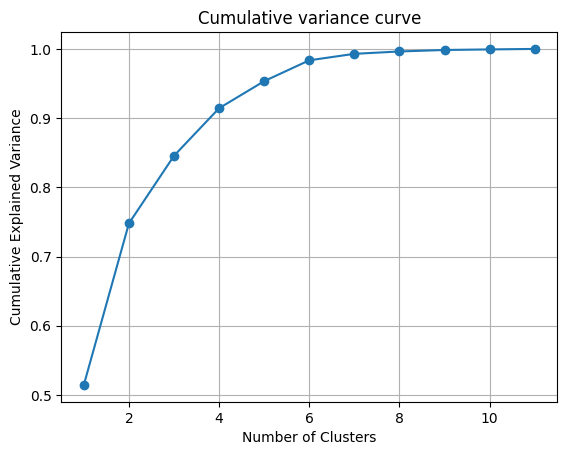

In [36]:
# Apply PCA for feature reduction
pca = PCA()
pca.fit(normalized_data)

# Calculate cumulative variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative variance curve
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative variance curve')
plt.grid(True)
plt.show()

### 6. Calculating and plotting silhouette scores

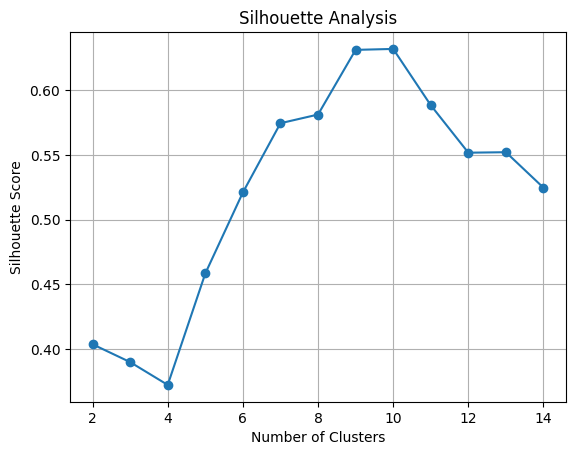

In [38]:
silhouette_scores = []
for n_clusters in range(2, 15):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=0, n_init='auto')
    cluster_labels = kmeans.fit_predict(normalized_data)
    silhouette_avg = silhouette_score(normalized_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.plot(range(2, 15), silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.grid(True)
plt.show()